### Aternating Least Squares

In [109]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%matplotlib inline

In [110]:
## Y = A*B

M = 3
N = 5
K = 2

A_true = np.mat(np.random.randn(M, K))
B_true = np.mat(np.random.randn(K, N))
print A_true
print B_true

[[-0.74999998 -0.05000765]
 [ 0.78267947  0.74945032]
 [-0.79017803  0.31069952]]
[[-0.76619522  1.24072827  0.80256836 -1.44095286  0.88351898]
 [ 1.70313438 -2.10460196  1.57452137 -0.70528595 -0.87542303]]


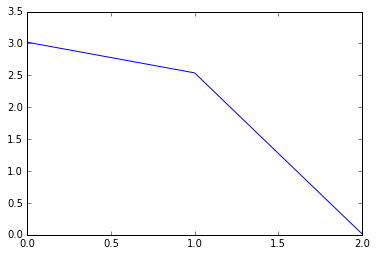

In [111]:
Y = A_true*B_true + 0.01 * np.random.randn(M, N)

U,S,VT = np.linalg.svd(Y)

plt.plot(S)

In [112]:
B = np.linalg.pinv(A_true)*Y
print(B)
print(B_true)

[[-0.74646574  1.2404609   0.80147564 -1.43755358  0.88762876]
 [ 1.6909715  -2.11632333  1.58069405 -0.68904013 -0.88817398]]
[[-0.76619522  1.24072827  0.80256836 -1.44095286  0.88351898]
 [ 1.70313438 -2.10460196  1.57452137 -0.70528595 -0.87542303]]


In [113]:
A = np.mat(np.random.randn(M, K))
B = np.mat(np.random.randn(K, N))
print A
print B

[[ 0.75468432  0.09570988]
 [ 1.2271405  -0.89352063]
 [ 1.0929551  -0.13919028]]
[[ 1.93657925  1.25404367 -0.18884194 -0.21987335 -0.69236316]
 [ 1.02234524 -1.07801519 -0.36108822 -0.24760247 -0.46300585]]


In [114]:
def calcError(A, B, Y):
    Y_est = A * B
    E = Y - Y_est
    err = np.sum(np.power(np.array(E), 2))
    return err

for e in range(3):
    print("\n{}.iteration".format(e))
    err = calcError(A, B, Y)
    print("error {}".format(err))
    
    B = np.linalg.pinv(A) * Y
    
    err = calcError(A, B, Y)
    print("error {}".format(err))
    
    A = (np.linalg.pinv(B.T) * Y.T).T

    err = calcError(A, B, Y)
    print("error {}".format(err))


0.iteration
error 34.0132382171
error 0.364141221241
error 0.000247868162967

1.iteration
error 0.000247868162967
error 0.000235472189778
error 0.000235471778204

2.iteration
error 0.000235471778204
error 0.00023547177819
error 0.00023547177819


In [118]:
A = np.mat(np.random.randn(M, K))
B = np.mat(np.random.randn(K, N))
print A
print B

def calcError(A, B, Y):
    Y_est = A * B
    E = Y - Y_est
    err = np.sum(np.power(np.array(E), 2))
    return err

for e in range(3):
    print("\n{}.iteration".format(e))
    err = calcError(A, B, Y)
    print("error {}".format(err))
    
    B = np.linalg.pinv(A) * Y
    
    err = calcError(A, B, Y)
    print("error {}".format(err))
    
#     A = Y * B.I
    A = (np.linalg.pinv(B.T) * Y.T).T

    err = calcError(A, B, Y)
    print("error {}".format(err))

[[ 1.49271901  0.09591168]
 [ 2.09648248  1.1766208 ]
 [-0.30242095 -0.70817388]]
[[-0.2627704  -0.89251764 -1.7932561   0.24007537 -1.60292735]
 [-0.96798084  0.84358299  0.06379516 -1.01190793 -0.42444443]]

0.iteration
error 66.5609466777
error 3.6454822564
error 0.000534182173417

1.iteration
error 0.000534182173417
error 0.000235482602798
error 0.000235471778584

2.iteration
error 0.000235471778584
error 0.00023547177819
error 0.00023547177819


In [106]:
A = np.mat(([1, 3], [2, 7]))
B = np.mat(([1], [2]))
W = A * B
print A
print B
print W

[[1 3]
 [2 7]]
[[1]
 [2]]
[[ 7]
 [16]]
